In [1]:

import pandas as pd
import numpy as np


In [2]:
df_PE_Sales = pd.read_csv('./../raw_data/Excel_files/Top5k_Sales_PE_new_model_20210507.csv', index_col=0)


In [3]:
###INTRODUCING THE REST
print(df_PE_Sales.head(20))
print(df_PE_Sales.dtypes)

            Sales_PE  Sales_PE_err  del_week  del_week_err  intercept  \
1000012530   -1.9986        0.3847   -0.0240        0.0169    11.0518   
1000021922   -2.3047        0.2505   -0.0345        0.0099    11.5462   
1000080319   -1.5376        0.3309   -0.0250        0.0074     9.3911   
1000125896   -0.5441        0.1666   -0.0100        0.0046     3.7622   
1000005727   -5.7456        1.1035   -0.0922        0.0790    29.4246   
1000007327   -1.8716        0.3578   -0.0080        0.0124    10.2591   
1000050787   -3.9959        1.0663   -0.0878        0.0826    21.4206   
1000116614   -3.3340        0.5784   -0.0406        0.0225    21.3211   
1000164660   -0.8282        0.2429   -0.0071        0.0133     5.7976   
1000176734   -2.7749        0.4104   -0.0730        0.0275    14.7727   
1000008470   -8.2657        0.6928   -0.0557        0.0241    39.3230   
1000124600   -1.6738        0.4070   -0.0213        0.0100    10.9776   
1000159178   -1.1119        0.2857   -0.0097       

In [4]:
df_filt = pd.read_csv('./../raw_data/Excel_files/Top5k_PE_filtered_20210510.csv', index_col=0)

In [5]:
#PREPARE THE CONVERSION RATE FILE
#final_items = list(df_result_true.index.values)
final_items = list(df_PE_Sales.index.values)
print(len(final_items))



2368


In [6]:
print(df_filt.head(10))

      min_date    max_date   item_code  item_price_x  delivery_weeks  \
0   2020-01-01  2020-05-23  1000012530         99.99               1   
2   2020-05-31  2020-06-26  1000012530         99.99               1   
5   2020-08-06  2020-08-20  1000012530         99.99               1   
7   2020-09-16  2020-10-31  1000012530         99.99               1   
8   2020-11-01  2020-11-07  1000012530         99.99               1   
9   2020-11-10  2020-11-22  1000012530         99.99               1   
11  2020-12-08  2020-12-27  1000012530         99.99               1   
12  2021-01-05  2021-02-13  1000012530         99.99               1   
13  2020-01-01  2020-03-13  1000021922        129.99               2   
14  2020-04-15  2020-04-21  1000021922        119.99               4   

    avg_sales  avg_unique_views  avg_sessions  avg_marketing_cost_spend  \
0    0.520833         35.743056  1.394209e+08             180433.654445   
2    0.444444         49.814815  1.140903e+08            

In [7]:
df_final = df_filt[df_filt['item_code'].isin(final_items)]

In [8]:
print(df_final.head())

     min_date    max_date   item_code  item_price_x  delivery_weeks  \
0  2020-01-01  2020-05-23  1000012530         99.99               1   
2  2020-05-31  2020-06-26  1000012530         99.99               1   
5  2020-08-06  2020-08-20  1000012530         99.99               1   
7  2020-09-16  2020-10-31  1000012530         99.99               1   
8  2020-11-01  2020-11-07  1000012530         99.99               1   

   avg_sales  avg_unique_views  avg_sessions  avg_marketing_cost_spend  \
0   0.520833         35.743056  1.394209e+08             180433.654445   
2   0.444444         49.814815  1.140903e+08              92373.876624   
5   0.533333         19.800000  9.381221e+07             123726.228592   
7   0.478261         36.652174  1.145263e+08             233867.366074   
8   1.714286         81.142857  1.253514e+08             305831.619103   

   conv_rate  ...  item_sub_category_1 item_sub_category_2 log_price  \
0   0.014573  ...                BÄNKE               BÄN

In [9]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master('local').config('spark.driver.memory', '8g').appName(
    'Sales_Margin_also').getOrCreate()


In [10]:
df_to_spark = df_final.groupby(['item_code']).nth(-1)
df_to_spark.reset_index(level=0, inplace=True)
df_to_spark.rename(columns={'index': 'item_code'}, inplace=True)


In [11]:
df_to_spark = df_to_spark[[
    'item_code',
    'min_date',
    'max_date',
    'item_price_x',
    'delivery_weeks',
    'avg_sales',
    'avg_unique_views',
    'avg_sessions',
    'avg_marketing_cost_spend',
    'conv_rate',
    'bin',
    'log_price',
    'log_delivery_weeks',
    'log_sales',
    'log_avg_unique_views',
    'log_conv_rate',
    'log_avg_sessions',
    'log_avg_marketing_cost_spend']]

In [12]:
df_to_spark.dtypes


item_code                         int64
min_date                         object
max_date                         object
item_price_x                    float64
delivery_weeks                    int64
avg_sales                       float64
avg_unique_views                float64
avg_sessions                    float64
avg_marketing_cost_spend        float64
conv_rate                       float64
bin                               int64
log_price                       float64
log_delivery_weeks              float64
log_sales                       float64
log_avg_unique_views            float64
log_conv_rate                   float64
log_avg_sessions                float64
log_avg_marketing_cost_spend    float64
dtype: object

In [13]:
df_final = df_final[[
    'item_code',
    'min_date',
    'max_date',
    'item_price_x',
    'delivery_weeks',
    'avg_sales',
    'avg_unique_views',
    'avg_sessions',
    'avg_marketing_cost_spend',
    'conv_rate',
    'bin',
    'log_price',
    'log_delivery_weeks',
    'log_sales',
    'log_avg_unique_views',
    'log_conv_rate',
    'log_avg_sessions',
    'log_avg_marketing_cost_spend']]
spark_df = spark.createDataFrame(df_final)

In [14]:
spark_df.createOrReplaceTempView('Final_table')


In [15]:
spark_last_price = spark.sql("""with max_price as (SELECT item_code, ROW_NUMBER() over (PARTITION BY item_code ORDER BY max_date DESC) as rn,
                                                    item_price_x, max_date, delivery_weeks
                                                    from final_table)
                                SELECT item_code, item_price_x, max_date, delivery_weeks
                                from max_price
                                where rn=1
                            """)
spark_last_price.show()

+----------+------------+----------+--------------+
| item_code|item_price_x|  max_date|delivery_weeks|
+----------+------------+----------+--------------+
|1000012836|      319.99|2021-02-01|             2|
|1000016121|      249.99|2021-02-21|             1|
|1000054054|      349.99|2021-02-25|             4|
|1000064483|       51.99|2021-02-19|             3|
|1000076400|      329.99|2021-02-25|             4|
|1000128161|      124.99|2021-02-25|             1|
|1000147156|      429.99|2021-02-25|             5|
|1000182808|     1049.99|2021-02-25|             2|
|1000211528|       94.99|2021-02-25|             1|
|1000007431|      104.99|2021-01-27|             4|
|1000008030|      229.99|2021-02-22|             2|
|1000008789|      124.99|2020-12-30|             1|
|1000048003|      349.99|2021-02-25|             2|
|1000087583|      199.99|2021-02-15|             9|
|1000101087|      249.99|2021-02-25|             3|
|1000101103|      249.99|2020-10-23|             3|
|1000121623|

In [16]:
spark_last_price.createOrReplaceTempView('last_price')


In [17]:
df_PE_Sales.dtypes

Sales_PE         float64
Sales_PE_err     float64
del_week         float64
del_week_err     float64
intercept        float64
intercept_err    float64
dtype: object

In [18]:

#df_result_true.reset_index(level=0,inplace=True)
df_PE_Sales.reset_index(level=0, inplace=True)



In [19]:
df_PE_Sales.rename(columns={'index': 'item_code'}, inplace=True)

In [20]:
print(df_PE_Sales.head())

    item_code  Sales_PE  Sales_PE_err  del_week  del_week_err  intercept  \
0  1000012530   -1.9986        0.3847   -0.0240        0.0169    11.0518   
1  1000021922   -2.3047        0.2505   -0.0345        0.0099    11.5462   
2  1000080319   -1.5376        0.3309   -0.0250        0.0074     9.3911   
3  1000125896   -0.5441        0.1666   -0.0100        0.0046     3.7622   
4  1000005727   -5.7456        1.1035   -0.0922        0.0790    29.4246   

   intercept_err  
0         1.9883  
1         1.1942  
2         1.9848  
3         1.0965  
4         5.0642  


In [21]:
spark_PE_df = spark.createDataFrame(df_PE_Sales)

In [22]:
spark_PE_df.show()

+----------+-------------------+-------------------+--------+------------+------------------+-------------+
| item_code|           Sales_PE|       Sales_PE_err|del_week|del_week_err|         intercept|intercept_err|
+----------+-------------------+-------------------+--------+------------+------------------+-------------+
|1000012530|            -1.9986|             0.3847|  -0.024|      0.0169|           11.0518|       1.9883|
|1000021922|            -2.3047|             0.2505| -0.0345|      0.0099|           11.5462|       1.1942|
|1000080319|            -1.5376|             0.3309|  -0.025|      0.0074|            9.3911|       1.9848|
|1000125896|            -0.5441|             0.1666|   -0.01|      0.0046|            3.7622|       1.0965|
|1000005727|            -5.7456|             1.1035| -0.0922|       0.079|           29.4246|       5.0642|
|1000007327|            -1.8716|             0.3578|  -0.008|      0.0124|           10.2591|       1.9009|
|1000050787|            -3.9

In [23]:
spark_PE_df.createOrReplaceTempView('final_PE')

In [24]:
spark_final = spark.sql("""SELECT ftf.*,
                            fpe.sales_pe,
                            fpe.sales_pe_err,
                            fpe.del_week as beta_del_week,
                            fpe.del_week_err as beta_del_week_err,
                            fpe.intercept,
                            fpe.intercept_err
                            from last_price as ftf
                            INNER JOIN final_pe as fpe on fpe.item_code = ftf.item_code""")
spark_final.show()
spark_final.createOrReplaceTempView('spark_final_tmp')

+----------+------------+----------+--------------+-------------------+-------------------+--------------------+-----------------+---------+-------------+
| item_code|item_price_x|  max_date|delivery_weeks|           sales_pe|       sales_pe_err|       beta_del_week|beta_del_week_err|intercept|intercept_err|
+----------+------------+----------+--------------+-------------------+-------------------+--------------------+-----------------+---------+-------------+
|1000012836|      319.99|2021-02-01|             2|            -1.7665|             0.4977|             -0.0437|           0.0364|   11.882|       3.2396|
|1000016121|      249.99|2021-02-21|             1|            -2.6608|             0.5909|             -0.0939|           0.0304|  16.2375|       3.4285|
|1000054054|      349.99|2021-02-25|             4|            -1.1775|0.23600000000000002|             -0.0131|           0.0064|    7.365|       1.2319|
|1000064483|       51.99|2021-02-19|             3|            -3.6067

In [25]:
#spark.sql("""SELECT COUNT(DISTINCT item_code)
#from spark_final_tmp""").show()



In [26]:
#Introduce d_item table
sp_df_item = spark.read.parquet(
    '/Users/gabriele.sabato/PycharmProjects/raw_data/redshift_tables/d_item/*.parquet',
    header=True)
sp_df_item.show()

+---------------+------------------+---------------------+-------------+----------------+----------+-------------+-----------+----------+-----------+--------------+-------------+--------------------+----------------------+--------------------+------------------+--------------------+------------------+------------------+-------------------+-------------------+---------+--------------------------------+---------------------------------------------+-----------------------+---------------------+------------------------+--------------------------+------------------------+--------------------+-----------+-------------------+------------------+-------------------+----------------------------+---------------+-----------------------+-----------------------+----------------------+------------------------------------+-------------------------------------------+-------------------------------------------------+--------------------------------------------------------+------------------------+------

In [27]:
#Introduce PC2 table
sp_df_pc2 = spark.read.parquet(
    '/Users/gabriele.sabato/PycharmProjects/raw_data/redshift_tables/f_item_status_last/*.parquet',
    header=True)
sp_df_pc2.show()

+-----------+---------+----------------+-----------------------+--------------------------+--------------------------+--------------------------+--------------------------------+---------------------------------+---------------------------------------+
|  item_skey|shop_skey|item_status_skey|item_status_weekly_skey|item_pc1_costs_before_cogs|item_pc2_costs_before_cogs|group_pc2_margin_simulated|group_pc2_margin_ratio_simulated|group_pc2_margin_simulated_pocket|group_pc2_margin_ratio_simulated_pocket|
+-----------+---------+----------------+-----------------------+--------------------------+--------------------------+--------------------------+--------------------------------+---------------------------------+---------------------------------------+
| 9022444508|        1|               1|                      1|                      null|                      null|                      null|                            null|                             null|                             

In [28]:
sp_df_item.createOrReplaceTempView('d_item_tmp')
sp_df_pc2.createOrReplaceTempView('d_item_pc2')

In [29]:
pc2_table = spark.sql(""" WITH pc2_avg as (
                            SELECT item_skey,
                            item_pc2_costs_before_cogs as pc2
                            from d_item_pc2
                            where shop_skey = 1)
                            SELECT pc.item_skey,di.item_code, pc.pc2
                            from d_item_tmp as di
                            INNER JOIN pc2_avg as pc on pc.item_skey = di.item_skey
                            where di.item_code like '0%'
                            """)
pc2_table.show()

+------------+------------------+-------+
|   item_skey|         item_code|    pc2|
+------------+------------------+-------+
| 52611470619|000000001000134743| 20.010|
| 84385921703|000000001000071807|156.289|
| 86157195106|000000001000244511| 13.960|
|127576841041|000000001000201449|   null|
|155168951323|000000001000168394| 93.569|
|160741357340|000000001000209207|159.479|
|192734622947|000000001000094810|355.430|
|205869855153|000000001000085488|248.090|
|224112330866|000000001000174074| 18.070|
|232914582312|000000001000219189| 17.859|
|250762505087|000000001000066133|  8.210|
|254111485931|000000001000179190|321.079|
|263925540263|000000001000116596| 60.799|
|295387713504|000000001000248814|761.179|
|296512802915|000000001000156944| 19.090|
|310102063324|000000001000136606| 56.909|
|318946574713|000000001000039659|205.020|
|350221455850|000000001000033289| 29.219|
|365206948338|000000001000112137| 50.729|
|374059249977|000000001000177970| 58.630|
+------------+------------------+-

In [30]:
pc2_table.createOrReplaceTempView('pc2_table')

In [31]:
spark.sql("""SELECT COUNT(item_code) FROM pc2_table""").show()
#spark.sql("""SELECT COUNT(item_skey) FROM pc2_table""").show()

+----------------+
|count(item_code)|
+----------------+
|          248019|
+----------------+



In [32]:
spark_pc2_final = spark.sql(""" SELECT sp.*, pc.pc2, pc.item_skey
                                from spark_final_tmp as sp
                                 INNER JOIN pc2_table as pc on sp.item_code = pc.item_code
                                 """)

spark_pc2_final.show()

+----------+------------+----------+--------------+-------------------+-------------------+--------------------+-----------------+---------+-------------+-------+---------------+
| item_code|item_price_x|  max_date|delivery_weeks|           sales_pe|       sales_pe_err|       beta_del_week|beta_del_week_err|intercept|intercept_err|    pc2|      item_skey|
+----------+------------+----------+--------------+-------------------+-------------------+--------------------+-----------------+---------+-------------+-------+---------------+
|1000012836|      319.99|2021-02-01|             2|            -1.7665|             0.4977|             -0.0437|           0.0364|   11.882|       3.2396|186.410|227644242866118|
|1000016121|      249.99|2021-02-21|             1|            -2.6608|             0.5909|             -0.0939|           0.0304|  16.2375|       3.4285|130.330| 40600078796222|
|1000054054|      349.99|2021-02-25|             4|            -1.1775|0.23600000000000002|             -

In [33]:
df_final_spark = spark_pc2_final.toPandas()

In [34]:
df_final_spark = df_final_spark.astype({'pc2': 'float64'})

In [35]:
df_final_spark.to_csv('./pickle_files/df_Sales_PE_ready_for_Margin_20210512.csv')

In [36]:

#After_VAT = 0.81
import math

In [37]:
df_final_spark.dtypes

item_code              int64
item_price_x         float64
max_date              object
delivery_weeks         int64
sales_pe             float64
sales_pe_err         float64
beta_del_week        float64
beta_del_week_err    float64
intercept            float64
intercept_err        float64
pc2                  float64
item_skey              int64
dtype: object

In [38]:
df_final_spark.head()

,item_code,item_price_x,max_date,delivery_weeks,sales_pe,sales_pe_err,beta_del_week,beta_del_week_err,intercept,intercept_err,pc2,item_skey
0,1000012836,319.99,2021-02-01,2,-1.7665,0.4977,-0.0437,0.0364,11.8820,3.2396,186.41,227644242866118
1,1000016121,249.99,2021-02-21,1,-2.6608,0.5909,-0.0939,0.0304,16.2375,3.4285,130.33,40600078796222
2,1000054054,349.99,2021-02-25,4,-1.1775,0.2360,-0.0131,0.0064,7.3650,1.2319,177.05,258578614695714
3,1000064483,51.99,2021-02-19,3,-3.6067,0.8091,-0.0383,0.0348,21.8127,4.7247,30.64,277856157534661
4,1000076400,329.99,2021-02-25,4,-1.5430,0.4513,-0.0243,0.0097,9.2073,2.6341,197.69,220435172610426


(array([  2.,   1.,   2.,   2.,   1.,   5.,   6.,  13.,  14.,  13.,  17.,
         22.,  33.,  41.,  57., 111., 203., 385., 683., 694.,  60.,   2.,
          0.,   0.,   1.]),
 array([-22.3379  , -21.257104, -20.176308, -19.095512, -18.014716,
        -16.93392 , -15.853124, -14.772328, -13.691532, -12.610736,
        -11.52994 , -10.449144,  -9.368348,  -8.287552,  -7.206756,
         -6.12596 ,  -5.045164,  -3.964368,  -2.883572,  -1.802776,
         -0.72198 ,   0.358816,   1.439612,   2.520408,   3.601204,
          4.682   ]),
 <BarContainer object of 25 artists>)

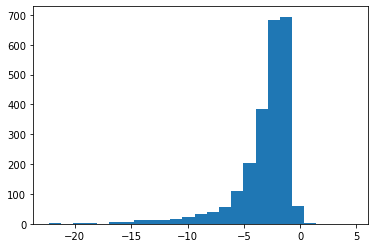

In [39]:
import matplotlib.pyplot as plt

plt.hist(df_final_spark['sales_pe'], bins=25)

(array([  1.,   0.,   0.,   0.,   3., 220., 820., 557., 294., 173.,  98.,
         54.,  37.,  26.,  22.,  20.,  16.,  12.,   6.,   0.,   4.,   0.,
          4.,   0.,   1.]),
 array([-27.8614  , -22.066496, -16.271592, -10.476688,  -4.681784,
          1.11312 ,   6.908024,  12.702928,  18.497832,  24.292736,
         30.08764 ,  35.882544,  41.677448,  47.472352,  53.267256,
         59.06216 ,  64.857064,  70.651968,  76.446872,  82.241776,
         88.03668 ,  93.831584,  99.626488, 105.421392, 111.216296,
        117.0112  ]),
 <BarContainer object of 25 artists>)

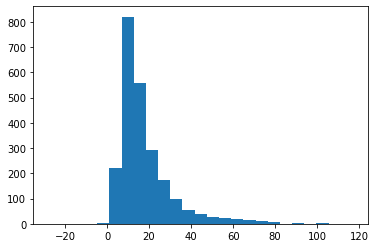

In [40]:
plt.hist(df_final_spark['intercept'], bins=25)

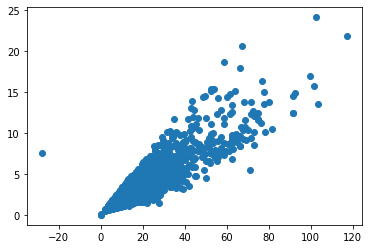

In [41]:
plt.scatter(df_final_spark['intercept'], df_final_spark['intercept_err'])

In [42]:
df_intercept_filter = df_final_spark.copy()
df_intercept_filter['intercept_rel_err'] = np.fabs(df_final_spark['intercept_err'] / df_final_spark['intercept'])
df_intercept_filter['beta_del_week_rel_err'] = np.fabs(
    df_final_spark['beta_del_week_err'] / df_final_spark['beta_del_week'])

In [43]:
#df_intercept_filter['intercept_rel_err'].nlargest()
df_intercept_filter = df_intercept_filter[3 * df_intercept_filter['intercept_rel_err'] < 1]
df_intercept_filter['intercept_rel_err'].nlargest()

32      0.332532
2065    0.330898
159     0.330792
799     0.330576
857     0.330522
Name: intercept_rel_err, dtype: float64

In [44]:
df_intercept_filter['beta_del_week_rel_err'].nlargest()
df_del_week_filter = df_intercept_filter[3 * df_intercept_filter['beta_del_week_rel_err'] < 1]
df_del_week_filter['intercept_rel_err'].nlargest()

1272    0.321718
191     0.318457
1880    0.316130
1661    0.314238
114     0.313918
Name: intercept_rel_err, dtype: float64

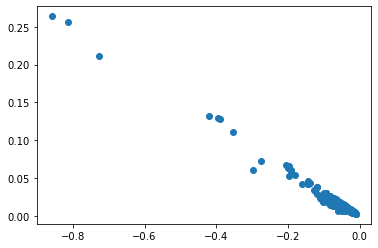

In [45]:
plt.scatter(df_del_week_filter['beta_del_week'], df_del_week_filter['beta_del_week_err'])

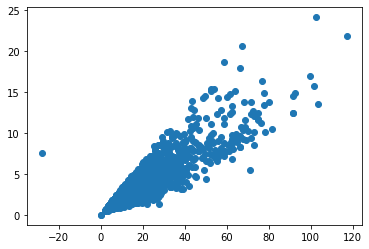

In [46]:
plt.scatter(df_intercept_filter['intercept'], df_intercept_filter['intercept_err'])

In [47]:
####### MARGIN #########
def calculate_Margin(dataf=df_final_spark, increment=0.01, direction='up', prev_inc = 0.0):
    if direction == 'down':
        increment *= -1
        prev_inc  *= -1

    VAT = 1.19

    N = int(increment/0.01)
    M = int(prev_inc/0.01)
    N_minus_M = N - M
    #print('N = ', N, 'M = ', M, 'N - M = ', N_minus_M)
    if np.fabs(increment) == 0.01:
        dataf['x'] = dataf['item_price_x']
        dataf['Delta_x'] = dataf['item_price_x'] * 0.01

    dataf['Delta_cost'] = ((dataf['x'] + M * dataf['Delta_x'])/VAT - dataf['pc2']) #change! x + 1dx

    dataf['Delta_N_Sales'] = N_minus_M * (dataf['Delta_x'] / (dataf['x'] + M * dataf['Delta_x'])) * dataf['sales_pe']
    dataf['log_x_prime'] = np.log(dataf['x'] + N*dataf['Delta_x'])
    dataf['N_prime_sales'] = dataf['sales_pe'] * dataf['log_x_prime'] + (
            dataf['beta_del_week'] * dataf['delivery_weeks']) + dataf['intercept']
    dataf['Delta_Margin'] = dataf['Delta_N_Sales'] * dataf['Delta_cost'] + dataf['N_prime_sales'] * N_minus_M * dataf['Delta_x']
    #dataf['N_prime_sales_err'] = np.sqrt(np.power(dataf['log_x_prime'] * dataf['sales_pe_err'], 2) + np.power(
    #    dataf['beta_del_week_err'] * dataf['delivery_weeks'], 2) + np.power(dataf['intercept_err'], 2))
    #dataf['Delta_Margin_err'] = np.sqrt(
    #    np.power(dataf['sales_pe_err'] * dataf['Delta_cost'] * dataf['Delta_x'] / dataf['x'], 2) + np.power(
    #        dataf['N_prime_sales_err'] * dataf['Delta_x'], 2))

    #dataf['N_prime_sales_err_no_intercept_err'] = np.sqrt(
    #    np.power(dataf['log_x_prime'] * dataf['sales_pe_err'], 2) + np.power(
    #        dataf['beta_del_week_err'] * dataf['delivery_weeks'], 2))
    #dataf['Delta_Margin_err_no_intercept'] = np.sqrt(
    ##    np.power(dataf['sales_pe_err'] * dataf['Delta_cost'] * dataf['Delta_x'] / dataf['x'], 2) + np.power(
    #        dataf['N_prime_sales_err_no_intercept_err'] * dataf['Delta_x'], 2))
    #dataf['N_prime_sales_err_no_del_week'] = np.sqrt(
    #    np.power(dataf['log_x_prime'] * dataf['sales_pe_err'], 2) + + np.power(dataf['intercept_err'], 2))
    #dataf['Delta_Margin_err_no_del_week'] = np.sqrt(
    #    np.power(dataf['sales_pe_err'] * dataf['Delta_cost'] * dataf['Delta_x'] / dataf['x'], 2) + np.power(
    #        dataf['N_prime_sales_err_no_del_week'] * dataf['Delta_x'], 2))

In [48]:
def classify(dataf=df_final_spark, flag='up'):
    direction = ['up', 'down']
    if flag == 'down':
        direction = direction[::-1]
    dataf['Group_flag'] = np.where(3 * dataf['Delta_Margin_err'] - np.fabs(dataf['Delta_Margin']) > 0, 'neutral',
                                   np.where(
                                       dataf['Delta_Margin'] > 0, direction[0],
                                       direction[1]))



In [49]:
def classify_no_err(dataf=df_final_spark, flag='up'):
    direction = ['up', 'down']
    if flag == 'down':
        direction = direction[::-1]

    dataf['Group_flag'] = np.where(dataf['Delta_Margin'] > 0, direction[0], 'not_defined')


In [50]:
original_df = df_final_spark.copy()
print(len(original_df.index))
tmp_df = pd.DataFrame()
original_df_up = pd.DataFrame()
original_df_down = pd.DataFrame()

2368


In [51]:
list_of_columns = [
    'item_code',
    'item_price_x',
    'x',
    'delivery_weeks',
    'sales_pe',
    'sales_pe_err',
    'beta_del_week',
    'beta_del_week_err',
    'intercept',
    'intercept_err',
    'Delta_x',
    'Delta_Margin']
increments_list = [0.01, 0.05, 0.1, 0.13, 0.14]

for index, inc in enumerate(increments_list):
    print('Increment = ' + str(inc))

    if inc == 0.01:
        original_tmp = original_df.copy()  #create tmp df
        calculate_Margin(original_df, inc, 'up')  #calculate Margin up
        classify_no_err(original_df, 'up')  #classify the new dataframe
        original_df_up = original_df_up.append(original_df[original_df['Group_flag'] == 'up'])
        #print(original_df.dtypes)
        #print(original_tmp.dtypes)
        #tmp_df = tmp_df.append(original_df[original_df['Group_flag'] == 'not_defined'])

        calculate_Margin(original_tmp, inc, 'down')
        classify_no_err(original_tmp, 'down')
        original_df_down = original_df_down.append(original_tmp[original_tmp['Group_flag'] == 'down'])
        #tmp_df = tmp_df.append(original_tmp[original_tmp['Group_flag'] == 'not_defined'])
        #print('up\n', original_df_up[list_of_columns].head())
        #print('down\n', original_df_down[list_of_columns].head())
        #print('tmp_df\n', tmp_df.head())
        #print('Total items\n', len(tmp_df.index) +len(original_df_up.index) + len(original_df_down.index))
    if inc > 0.01:
        #increment_price(original_df_up)
        calculate_Margin(original_df_up, inc, 'up', increments_list[index-1])
        classify_no_err(original_df_up, 'up')
        #tmp_df = tmp_df.append(original_df_up[original_df_up['Group_flag'] == 'not_defined'])
        original_df_up = original_df_up[original_df_up['Group_flag'] == 'up']

        #increment_price(original_df_down)
        calculate_Margin(original_df_down, inc, 'down', increments_list[index-1])
        classify_no_err(original_df_down, 'down')
        #tmp_df = tmp_df.append(original_df_down[original_df_down['Group_flag'] == 'not_defined'])
        original_df_down = original_df_down[original_df_down['Group_flag'] == 'down']
        #print('up\n', original_df_up[list_of_columns].head())
        #print('down\n', original_df_down[list_of_columns].head())
        #print('tmp\n',tmp_df_neutral.head())
        #print('up\n', original_df_up.head())
        #print('down\n',original_df_down.head())

    #original_df_down['Margin_base'] = original_df_down['Margin_down']
    #original_df_up['Margin_base'] = original_df_up['Margin_up']
    original_df_up ['Increment'] = f'{inc*100.}%'
    original_df_down ['Increment'] = f'{-inc*100.}%'
    print(len(original_df_up.index))
    print(len(original_df_down.index))
    #print(original_df_up.head())


Increment = 0.01
989
1340
Increment = 0.05
924
1237
Increment = 0.1
809
1101
Increment = 0.13
725
965
Increment = 0.14
691
891


In [52]:
original_df_up.head()
original_df_down.head()

,item_code,item_price_x,max_date,delivery_weeks,sales_pe,sales_pe_err,beta_del_week,beta_del_week_err,intercept,intercept_err,...,item_skey,x,Delta_x,Delta_cost,Delta_N_Sales,log_x_prime,N_prime_sales,Delta_Margin,Group_flag,Increment
6,1000147156,429.99,2021-02-25,5,-3.2220,0.3670,-0.0276,0.0102,18.8254,2.0617,...,232337232737743,429.99,4.2999,153.142437,0.037034,5.912939,-0.364090,7.237100,down,-14.000000000000002%
7,1000182808,1049.99,2021-02-25,2,-5.0703,1.4550,0.1541,0.1588,34.1513,9.7325,...,19647339763936,1049.99,10.4999,432.449748,0.058279,6.805713,-0.047507,25.701689,down,-14.000000000000002%
9,1000007431,104.99,2021-01-27,4,-22.3379,2.9377,-0.1140,0.1443,103.6526,13.5207,...,73591042629309,104.99,1.0499,33.767395,0.256757,4.503042,2.608093,5.931794,down,-14.000000000000002%
12,1000048003,349.99,2021-02-25,2,-2.3721,0.5706,0.0010,0.0125,14.1651,3.0970,...,33009929417484,349.99,3.4999,87.475042,0.027266,5.707082,0.629332,0.182455,down,-14.000000000000002%
13,1000087583,199.99,2021-02-15,9,-1.7298,0.4018,-0.0314,0.0068,9.4184,2.0739,...,191583886188344,199.99,1.9999,31.991176,0.019883,5.147444,0.231751,0.172595,down,-14.000000000000002%


In [53]:
original_df_up.to_csv('../raw_data/Excel_files/Item_margin_up_pre_pc2_change_Feb2021.csv')
original_df_down.to_csv('../raw_data/Excel_files/Item_margin_down_pre_pc2_change_Feb2021.csv')

In [54]:
original_tmp.dtypes

item_code              int64
item_price_x         float64
max_date              object
delivery_weeks         int64
sales_pe             float64
sales_pe_err         float64
beta_del_week        float64
beta_del_week_err    float64
intercept            float64
intercept_err        float64
pc2                  float64
item_skey              int64
x                    float64
Delta_x              float64
Delta_cost           float64
Delta_N_Sales        float64
log_x_prime          float64
N_prime_sales        float64
Delta_Margin         float64
Group_flag            object
dtype: object

In [55]:
original_tmp['DM_err_ratios'] = original_tmp['Delta_Margin_err'] / original_tmp['Delta_Margin_err_no_intercept']
original_tmp['N_sales_err_ratios'] = original_tmp['N_prime_sales_err'] / original_tmp[
    'N_prime_sales_err_no_intercept_err']
original_tmp['DM_err_ratios_dw'] = original_tmp['Delta_Margin_err'] / original_tmp['Delta_Margin_err_no_del_week']
original_tmp['N_sales_err_ratios_dw'] = original_tmp['N_prime_sales_err'] / original_tmp[
    'N_prime_sales_err_no_del_week']

KeyError: 'Delta_Margin_err'

In [ ]:
print(original_tmp['DM_err_ratios'].mean(), original_tmp['N_sales_err_ratios'].mean())
print(original_tmp['DM_err_ratios_dw'].mean(), original_tmp['N_sales_err_ratios_dw'].mean())

In [141]:
#original_tmp['DM_err_ratios'].nsmallest(10)
#original_tmp['DM_err_ratios'].nlargest(10)

767     1.822608
1407    1.785157
3       1.780338
479     1.746467
1246    1.745130
1112    1.739136
773     1.732356
723     1.704401
2053    1.703977
1805    1.703507
Name: DM_err_ratios, dtype: float64

In [ ]:
list_of_columns_up = ['item_code', 'avg_conv_rate', 'avg_unique_views', 'last_date', 'last_price', 'price_up', 'PE',
                      'PE_err', 'Sales_PE', 'Sales_PE_err', 'Delta_price', 'pc2', 'avg_sales', 'avg_sales_up',
                      'avg_sales_err_up', 'Margin_base', 'Margin_up', 'Group_flag']
list_of_columns_down = ['item_code', 'avg_conv_rate', 'avg_unique_views', 'last_date', 'last_price', 'price_down', 'PE',
                        'PE_err', 'Sales_PE', 'Sales_PE_err', 'Delta_price', 'pc2', 'avg_sales', 'avg_sales_down',
                        'avg_sales_err_down', 'Margin_base', 'Margin_down', 'Group_flag']
create_auxiliary_var(original_df)
for inc in [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]:
    print('Increment = ' + str(inc))
    if inc == 0.01:
        create_Margin(inc, original_df, 'up')
        create_Margin(inc, original_df, 'down')
        classify(original_df)
        tmp_df = tmp_df.append(original_df[original_df['Group_flag'] == 'neutral'])
        original_df_up = original_df_up.append(original_df[original_df['Group_flag'] == 'up'])
        original_df_up = original_df_up[list_of_columns_up]
        original_df_down = original_df_down.append(original_df[original_df['Group_flag'] == 'down'])
        original_df_down = original_df_down[list_of_columns_down]
        #print('tmp\n',tmp_df[list_of_columns].head())
        #print('up\n', original_df_up[list_of_columns].head())
        #print('down\n',original_df_down[list_of_columns].head())

    if inc > 0.01:
        create_Margin(inc, original_df_up, 'up')
        create_Margin(inc, original_df_down, 'down')
        classify_up(original_df_up)
        classify_down(original_df_down)
        tmp_df = tmp_df.append(original_df_up[original_df_up['Group_flag'] == 'neutral_up'])
        tmp_df = tmp_df.append(original_df_down[original_df_down['Group_flag'] == 'neutral_down'])
        original_df_up = original_df_up[original_df_up['Group_flag'] == 'up']
        original_df_down = original_df_down[original_df_down['Group_flag'] == 'down']
        #print('tmp\n',tmp_df[list_of_columns].head())
        #print('up\n', original_df_up[list_of_columns].head())
        #print('down\n',original_df_down[list_of_columns].head())
    original_df_down['Margin_base'] = original_df_down['Margin_down']
    original_df_up['Margin_base'] = original_df_up['Margin_up']

    print(len(tmp_df.index))
    print(len(original_df_up.index))
    print(len(original_df_down.index))

In [ ]:
tmp_df
#print(or_filt_df[or_filt_df['Group_flag'] =='down'])
#print(or_filt_df[or_filt_df['Group_flag'] =='up'])
#print(or_filt_df[or_filt_df['Group_flag'] =='neutral'])

In [ ]:
tmp_df.set_index(['Group_flag', 'item_code']).count(level='Group_flag')
#554 neutral, 4 down ,440 up

In [ ]:
tmp_df['Margin_base'] = df_merged['Margin_base']
tmp_df.head()
#df_final_spark.head(400)


In [ ]:
#tmp_df[['item_code','avg_conv_rate','last_price','PE','PE_err','has_enough_stat','pc2','price_up','price_down','Margin_base','Margin_up','Margin_err_up','Margin_down','Margin_err_down','Group_flag']].head(400)


In [ ]:
tmp_df = tmp_df.sort_index()

In [ ]:
#I AM HERE NEED TO UPDATE THIS
tmp_df['Margin_rate_to_base'] = np.where(tmp_df['Group_flag'] == 'neutral', 0.,
                                         np.where(tmp_df['Group_flag'] == 'neutral_up',
                                                  np.log(tmp_df['Margin_up'] / tmp_df['Margin_base']),
                                                  np.log(tmp_df['Margin_down'] / tmp_df['Margin_base'])))
#tmp_df['Margin_rate_to_last'] = np.log(tmp_df['Margin_down']/tmp_df['Margin_last'])

In [ ]:
list_of_columns_down.append('Margin_err_down')

In [ ]:
list_of_columns_up.append('Margin_err_up')

In [ ]:
tmp_df[list_of_columns_down]



In [ ]:
tmp_df[list_of_columns_up]

In [ ]:
#print(tmp_df['Margin_rate_to_base'].mean()*100)

In [ ]:
tmp_df.to_csv('../raw_data/Excel_files/Margin_result_Sales_PE.csv')

In [ ]:
tmp_df_only_change = tmp_df[tmp_df['Group_flag'] != 'neutral']


In [ ]:
tmp_df_only_change['Margin_rate_to_base'].mean()

In [ ]:
tmp_df_only_change['Margin_rate_to_base'].nlargest(10)


In [ ]:
tmp_df_only_change['Margin_rate_to_base'].median()


